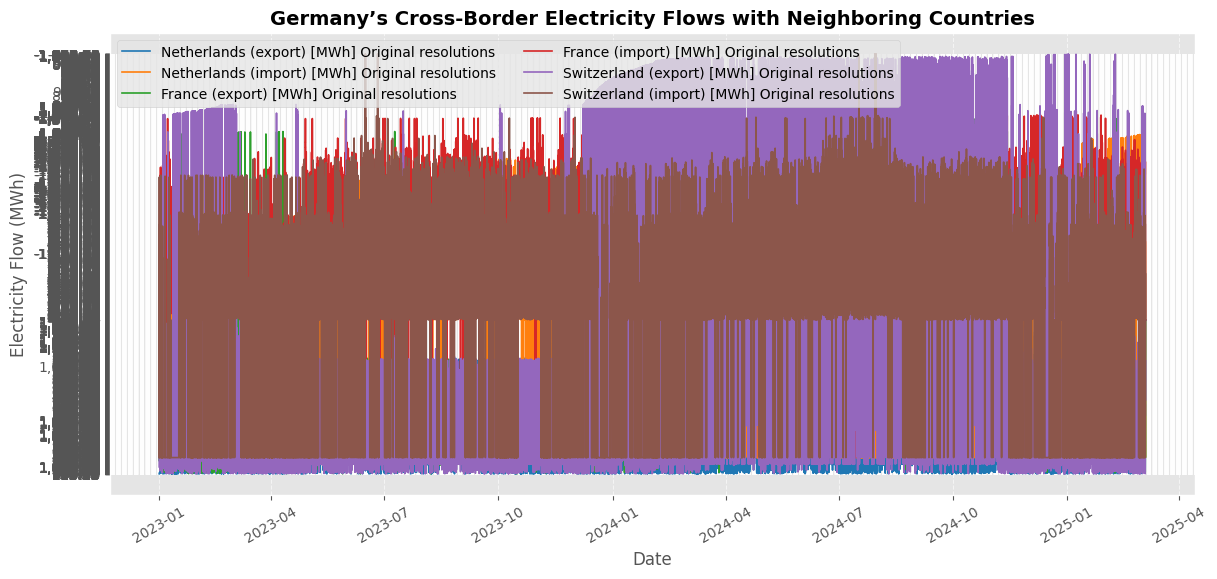

Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\eda-analysis\..\plots\germany_cross_border_electricity_flows.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define directories
BASE_DIR = os.getcwd()
PLOTS_DIR = os.path.join(BASE_DIR, "..", "plots")

file_path = "../data/refined_files/refined_cleaned_Cross-border_physical_flows_202301010000_202503050000_Quarterhour.csv"

# Load dataset
df = pd.read_csv(file_path, delimiter=",", decimal=",", low_memory=False)

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"])

# Define relevant columns for Germany’s cross-border electricity flows
selected_countries = [
    "Netherlands (export) [MWh] Original resolutions", "Netherlands (import) [MWh] Original resolutions",
    "France (export) [MWh] Original resolutions", "France (import) [MWh] Original resolutions",
    "Switzerland (export) [MWh] Original resolutions", "Switzerland (import) [MWh] Original resolutions"
]

# Check if all selected columns exist in the dataset
missing_cols = [col for col in selected_countries if col not in df.columns]
if missing_cols:
    raise KeyError(f"Columns not found in the dataset: {missing_cols}")

# Keep only necessary columns
df_selected = df[["Start date"] + selected_countries]

# Apply consistent styling
plt.style.use("ggplot")

# Define color palette for better distinction
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Plot cross-border flows
plt.figure(figsize=(14, 6))
for i, country in enumerate(selected_countries):
    plt.plot(df_selected["Start date"], df_selected[country], label=country, color=colors[i % len(colors)], linewidth=1.2)

# Refining plot elements
plt.xlabel("Date", fontsize=12)
plt.ylabel("Electricity Flow (MWh)", fontsize=12)
plt.title("Germany’s Cross-Border Electricity Flows with Neighboring Countries", fontsize=14, fontweight="bold")
plt.legend(fontsize=10, loc="upper left", ncol=2)
plt.xticks(rotation=30)  # Rotate x-axis for readability
plt.grid(True, linestyle="--", alpha=0.6)

# Save refined figure with an improved filename
plot_filename = "germany_cross_border_electricity_flows.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
